In [219]:
from rdkit import Chem
from rdkit.Chem import rdChemReactions
from rdkit.Chem.Draw import MolsToGridImage


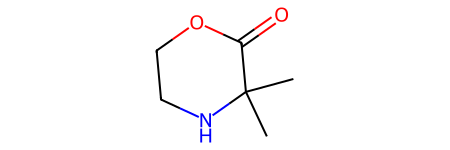

In [220]:
cycle_smiles = "CC1(C)NCCOC1=O"
dp0 = Chem.MolFromSmiles(cycle_smiles)
dp0

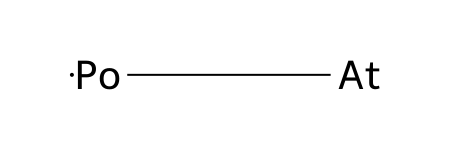

In [221]:
helper = Chem.MolFromSmiles("[Po]-[At]")
helper

### Initiation (cyclic)

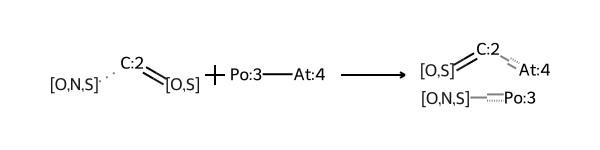

In [222]:
initiation = rdChemReactions.ReactionFromSmarts(
    "([O,N,S:1]@[CX3:2]=[O,S:5]).[Po:3]-[At:4]>>([O,N,S:1][Po:3].[C:2](=[O,S:5])[At:4])"
)
initiation

Num products: 1


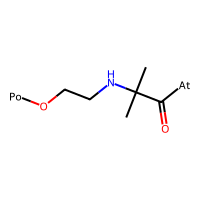

In [223]:
# first step (dp 0 to dp 1)
products = [item[0] for item in initiation.RunReactants((dp0, helper))]
print("Num products:", len(products))
dp1 = products[0]
MolsToGridImage(products, molsPerRow=len(products))

### Propagation reaction (should work for everything)

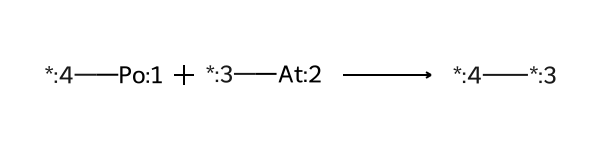

In [224]:
prop = rdChemReactions.ReactionFromSmarts(
    "[*:4]-[Po:1].[At:2]-[*:3]>>[*:4]-[*:3]"
)
prop

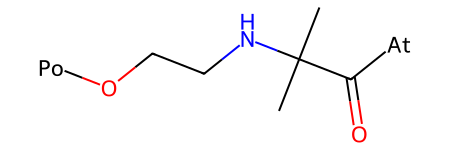

In [225]:
dp1

In [226]:
products = [item[0] for item in prop.RunReactants((dp1, dp1))]
assert(len(products) == 1)
products

[12:54:13] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 1 2 


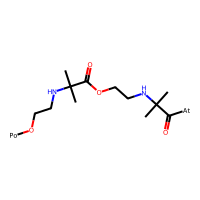

In [227]:
MolsToGridImage(products, molsPerRow=1)

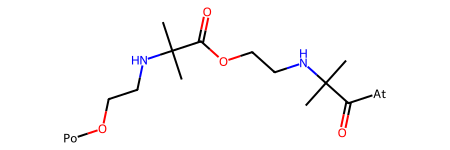

In [228]:
dp2 = products[0]
dp2

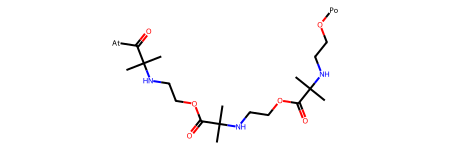

In [229]:
products = [item[0] for item in prop.RunReactants((dp1, dp2))]
assert(len(products) == 1)
dp3 = products[0]
dp3

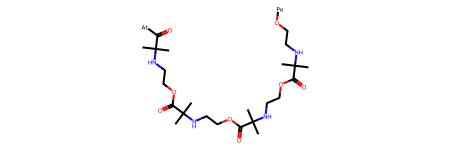

In [230]:
products = [item[0] for item in prop.RunReactants((dp1, dp3))]
assert(len(products) == 1)
dp4 = products[0]
dp4

### Replace end groups with CH3s

In [231]:
replaceAt = rdChemReactions.ReactionFromSmarts(
    "[At:1]>>[C:1]"
)
replacePo = rdChemReactions.ReactionFromSmarts(
    "[Po:1]>>[C:1]"
)

In [232]:
replaceAt.RunReactantInPlace(dp4)

True

In [233]:
replacePo.RunReactantInPlace(dp4)

True

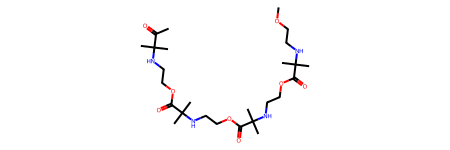

In [234]:
dp4